In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from pair_prediction.data.read import read_idx_file, read_matrix_file
from pair_prediction.visualization.base import draw_rna_structure
from pair_prediction.data.processing import create_rna_graph

DATA_DIR = Path("/Users/dawid/Private/School/Master's Thesuis/non-canonical-base-pair-prediction/data/raw/")
IDX_DIR = DATA_DIR / 'idxs'
MATRIX_DIR = DATA_DIR / 'matrices'

Sequence: CUUAUAGGGUUGGUAAAUUUUAACCCAAACUAA
Details: [{'res_number': 1, 'chain_id': 'A', 'res_type': 'C', 'res_id': 18}, {'res_number': 2, 'chain_id': 'A', 'res_type': 'U', 'res_id': 19}, {'res_number': 3, 'chain_id': 'A', 'res_type': 'U', 'res_id': 20}, {'res_number': 4, 'chain_id': 'A', 'res_type': 'A', 'res_id': 21}, {'res_number': 5, 'chain_id': 'A', 'res_type': 'U', 'res_id': 22}, {'res_number': 6, 'chain_id': 'A', 'res_type': 'A', 'res_id': 23}, {'res_number': 7, 'chain_id': 'A', 'res_type': 'G', 'res_id': 222}, {'res_number': 8, 'chain_id': 'A', 'res_type': 'G', 'res_id': 223}, {'res_number': 9, 'chain_id': 'A', 'res_type': 'G', 'res_id': 224}, {'res_number': 10, 'chain_id': 'A', 'res_type': 'U', 'res_id': 225}, {'res_number': 11, 'chain_id': 'A', 'res_type': 'U', 'res_id': 226}, {'res_number': 12, 'chain_id': 'A', 'res_type': 'G', 'res_id': 227}, {'res_number': 13, 'chain_id': 'A', 'res_type': 'G', 'res_id': 228}, {'res_number': 14, 'chain_id': 'A', 'res_type': 'U', 'res_id': 2

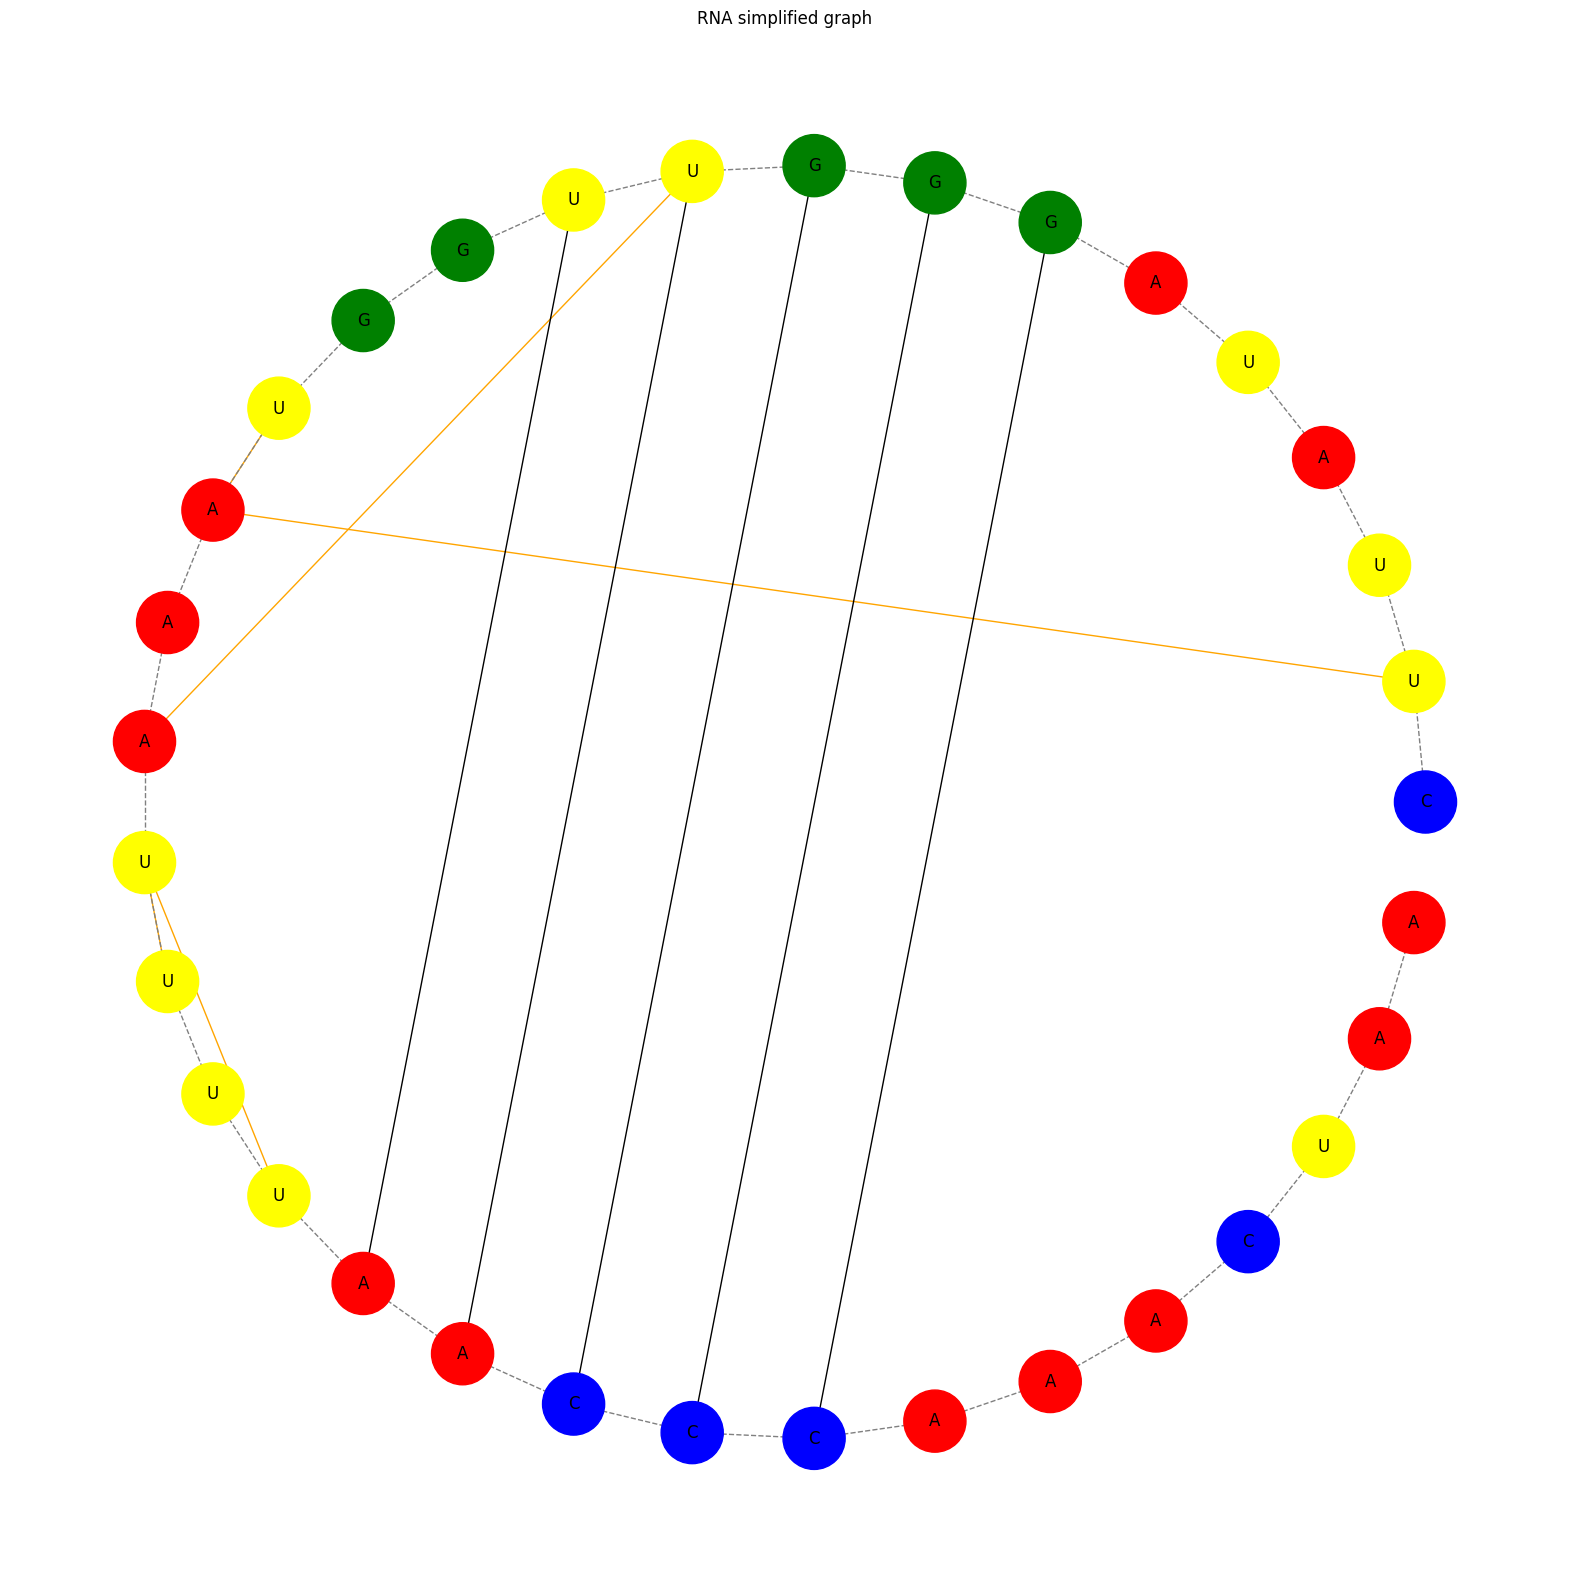

In [8]:
# Example
filename = "7PNV_1_A_A_266_C"
idx_file = IDX_DIR / f"{filename}.idx"
cmt_file = MATRIX_DIR / f"{filename}.cmt"
amt_file = MATRIX_DIR / f"{filename}.amt"

seq, details = read_idx_file(idx_file)
cmt_matrix = read_matrix_file(cmt_file)
amt_matrix = read_matrix_file(amt_file)

print("Sequence:", seq)
print("Details:", details)
print("CMT:", sum(cmt_matrix == 1))
print("AMT:", sum(amt_matrix > 1))

draw_rna_structure(seq, amt_matrix)

Text(0, 0.5, 'Nucleotide index')

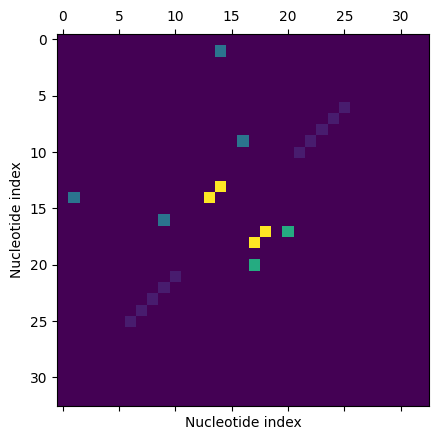

In [3]:
plt.matshow(amt_matrix)
plt.xlabel("Nucleotide index")
plt.ylabel("Nucleotide index")

In [22]:
# Read all files
sequences = []
sequences_details = []
amt_matrixes = []

for idx_file in IDX_DIR.glob("*.idx"):
    filename = idx_file.stem
    amt_file = MATRIX_DIR / f"{filename}.amt"
    try:
        seq, details = read_idx_file(idx_file)
        amt_matrix = read_matrix_file(amt_file)
        
        sequences.append(seq)
        sequences_details.append(details)
        amt_matrixes.append(amt_matrix)
    except Exception as e:
        print(f"Error of {filename}: {e}")

Error of 5LZD_1_y_y_60_U: invalid literal for int() with base 10: '5^A'
Error of 6HD7_1_B_B_16_U: invalid literal for int() with base 10: '17^A'
Error of 7RQB_1_1A_A_340_A: invalid literal for int() with base 10: '614^A'
Error of 6HA8_1_x_x_58_A: invalid literal for int() with base 10: '17^A'
Error of 3ZGZ_1_B_B_6_G: invalid literal for int() with base 10: '47^J'
Error of 3AMU_1_B_B_9_A: invalid literal for int() with base 10: '21^A'
Error of 7RQB_1_1A_A_1453_U: invalid literal for int() with base 10: '1450^A'
Error of 7RQB_1_1A_A_1146_C: invalid literal for int() with base 10: '1142^A'
Error of 7RQB_1_1A_A_657_U: invalid literal for int() with base 10: '652^V'
Error of 7RQB_1_1A_A_1202_C: invalid literal for int() with base 10: '614^A'
Error of 1H4S_1_T_T_15_G: invalid literal for int() with base 10: '17^A'
Error of 7RQB_1_1A_A_147_U: invalid literal for int() with base 10: '143^A'
Error of 7RQB_1_1A_A_139A_G: invalid literal for int() with base 10: '139^A'
Error of 3ADD_1_C_C_21_C: i

In [31]:
stats = []
for matrix in amt_matrixes:
    canonical_pairs_number = sum(sum(matrix == 1))
    non_canonical_pairs_number = sum(sum(matrix > 1))
    stats.append({"Canonical pairs": canonical_pairs_number, "Non-canonical pairs": non_canonical_pairs_number})

stats_df = pd.DataFrame(stats)

array([[<Axes: title={'center': 'Canonical pairs'}>,
        <Axes: title={'center': 'Non-canonical pairs'}>]], dtype=object)

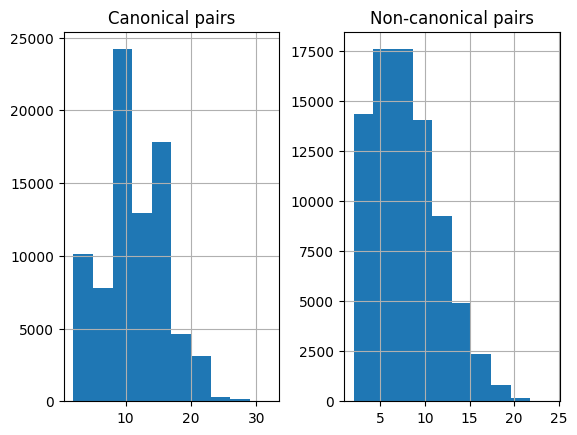

In [33]:
stats_df.hist()

<Axes: >

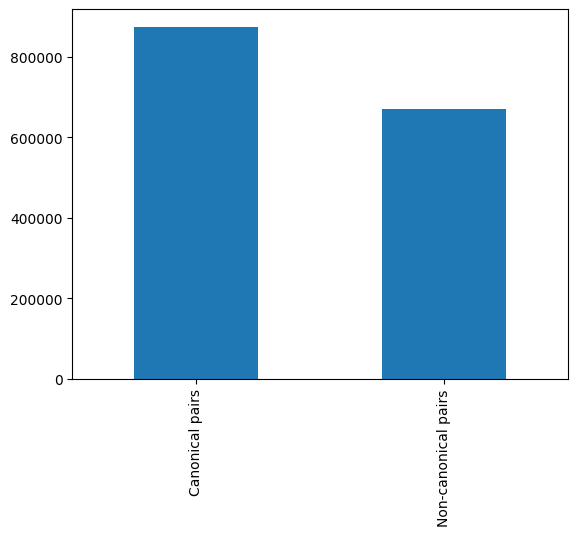

In [35]:
stats_df.sum().plot(kind='bar')

### Questions
- What does mean 10^A in sequence? - around 1k sequences with such information
- Do we assume that using only canonical pairs we will be able to predict non-canonical pairs? Or maybe we should just try to predict arbitrary type of pair without the differentiation? 
- Is phosporane bond also an edge in graph? I assume yes.
- Should we represent the edges as directed? it would allow of the information pass for only one side
- What features can we extract for nucleotides, pairings etc?
    - One-Hot encoding for nucleotides / edge types (?)